# Ames Housing Regression Challenge

#### The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses. 

##### dataset can be found [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

#### Purpose of this project to take the Ames Boston Housing dataset from Kaggle and create a model to that will predict the housing prices based on feature(s) within the dataset.

###### We will be covering the following processes throughout the workflow of this dataset:
- EDA
- Visualization via Matplotlib and Seaborn libraries
- Data Munging/Cleaning
- Exploring domain knowledge
- Dataframe analysis using Pandas
- Modelling using Sci-kit Learn library

In [1]:
# Importing all the necessary libraries possibly needed. May need more depending as we progress.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.preprocessing import Binarizer, Imputer, \
    OneHotEncoder, PolynomialFeatures, StandardScaler, \
    MinMaxScaler, RobustScaler
    
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# setting view to widen so can display all the columns

In [3]:
train = pd.read_csv('train.csv') # reading the training data set from the Ames housing dataset
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


In [4]:
test = pd.read_csv('test (1).csv') # reading the test datset
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,Unf,0.0,1020.0,1020.0,GasA,Gd,N,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1.0,440.0,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1967.0,1967.0,GasA,TA,Y,SBrkr,1967,0,0,1967,0.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2.0,580.0,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554.0,Unf,0.0,100.0,654.0,GasA,Ex,Y,SBrkr,664,832,0,1496,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2.0,426.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,968.0,968.0,GasA,TA,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2.0,480.0,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,Gd,Y,SBrkr,1394,0,0,1394,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
print(train.shape) #Viewing the number of rows and columns for each dataset
print(test.shape)

(2051, 82)
(879, 80)


In [6]:
print(train.columns.values) # Viewing all feature names for training dataset

['Id' 'PID' 'MS SubClass' 'MS Zoning' 'Lot Frontage' 'Lot Area' 'Street'
 'Alley' 'Lot Shape' 'Land Contour' 'Utilities' 'Lot Config' 'Land Slope'
 'Neighborhood' 'Condition 1' 'Condition 2' 'Bldg Type' 'House Style'
 'Overall Qual' 'Overall Cond' 'Year Built' 'Year Remod/Add' 'Roof Style'
 'Roof Matl' 'Exterior 1st' 'Exterior 2nd' 'Mas Vnr Type' 'Mas Vnr Area'
 'Exter Qual' 'Exter Cond' 'Foundation' 'Bsmt Qual' 'Bsmt Cond'
 'Bsmt Exposure' 'BsmtFin Type 1' 'BsmtFin SF 1' 'BsmtFin Type 2'
 'BsmtFin SF 2' 'Bsmt Unf SF' 'Total Bsmt SF' 'Heating' 'Heating QC'
 'Central Air' 'Electrical' '1st Flr SF' '2nd Flr SF' 'Low Qual Fin SF'
 'Gr Liv Area' 'Bsmt Full Bath' 'Bsmt Half Bath' 'Full Bath' 'Half Bath'
 'Bedroom AbvGr' 'Kitchen AbvGr' 'Kitchen Qual' 'TotRms AbvGrd'
 'Functional' 'Fireplaces' 'Fireplace Qu' 'Garage Type' 'Garage Yr Blt'
 'Garage Finish' 'Garage Cars' 'Garage Area' 'Garage Qual' 'Garage Cond'
 'Paved Drive' 'Wood Deck SF' 'Open Porch SF' 'Enclosed Porch' '3Ssn Porch'
 'Scree

In [7]:
train.dtypes # viewing column types

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [8]:
train.select_dtypes(include=['object']).columns.values
# viewing string value columns

array(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation',
       'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type',
       'Sale Condition'], dtype=object)

In [9]:
train.select_dtypes(include=['int64']).columns.values
# viewing all numerical value columns

array(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold',
       'Yr Sold', 'SalePrice'], dtype=object)

In [10]:
train.select_dtypes(include=['float']).columns.values
# Viewing all float columns

array(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'], dtype=object)

In [11]:
train.isnull().sum()
# Viewing the null values

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [12]:
# Splitting the categorical variables and numerical variables in the training data
train_cat = train.select_dtypes(include=['object'])
train_num = pd.DataFrame(train.select_dtypes(include=['int64', 'float']))

In [13]:
print(train_cat.shape) # viewing the shape of dataframe between the categorical and numerical
print(train_num.shape)

(2051, 43)
(2051, 39)


In [14]:
train_num.columns.values # viewing all numerical features in the training data

array(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'], dtype=object)

In [15]:
train_cat.columns.values # viewing all categorical features in the training data

array(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation',
       'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type',
       'Sale Condition'], dtype=object)

In [16]:
for col in train_cat:
    print(col, ':\n', train_cat[col].unique())
# viewing all unique values for categorial columns, including NaN

MS Zoning :
 ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
Street :
 ['Pave' 'Grvl']
Alley :
 [nan 'Pave' 'Grvl']
Lot Shape :
 ['IR1' 'Reg' 'IR2' 'IR3']
Land Contour :
 ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities :
 ['AllPub' 'NoSeWa' 'NoSewr']
Lot Config :
 ['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
Land Slope :
 ['Gtl' 'Sev' 'Mod']
Neighborhood :
 ['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale' 'CollgCr'
 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor' 'IDOTRR'
 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr' 'Blmngtn'
 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
Condition 1 :
 ['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
Condition 2 :
 ['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
Bldg Type :
 ['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
House Style :
 ['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']
Roof Style :
 ['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']
Roof Matl

In [17]:
for col in train:
    print(col, ':\n', train[col].unique())
# viewing all unique values in the features to see where NaN are at

Id :
 [109 544 153 ..., 916 639  10]
PID :
 [533352170 531379050 535304180 ..., 909253010 535179160 527162130]
MS SubClass :
 [ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]
MS Zoning :
 ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
Lot Frontage :
 [  nan   43.   68.   73.   82.  137.   35.   70.   21.   64.  120.   24.
   74.   93.   34.   80.   71.   72.  109.   40.  103.  100.   92.   65.
   75.   60.   30.   79.   41.  105.  107.   81.   36.   63.   32.   94.
   44.   50.   48.   67.   88.   83.   53.   58.   57.   52.   87.  134.
   56.   54.  140.   78.   85.   90.   96.   62.   49.   59.  155.   91.
   61.   86.  128.   77.   42.   89.   51.   69.   55.  112.   76.  125.
   98.  113.  102.   22.  122.   84.  119.  118.   66.   95.  108.  195.
  106.   39.  110.  130.   97.   45.   37.  123.   38.  129.  115.   47.
  114.  104.   46.  121.  124.  313.  141.  101.   99.  160.  174.   26.
  144.  138.  111.   25.   33.  200.  150.  117.  153.  116.  135.]
Lo

Full Bath :
 [2 1 3 0 4]
Half Bath :
 [1 0 2]
Bedroom AbvGr :
 [3 4 2 5 1 0 6 8]
Kitchen AbvGr :
 [1 2 0 3]
Kitchen Qual :
 ['Gd' 'TA' 'Fa' 'Ex']
TotRms AbvGrd :
 [ 6  8  5  7  9  4 12 11 10  3 14  2 13 15]
Functional :
 ['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Sal' 'Maj2']
Fireplaces :
 [0 1 2 4 3]
Fireplace Qu :
 [nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']
Garage Type :
 ['Attchd' 'Detchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']
Garage Yr Blt :
 [ 1976.  1997.  1953.  2007.  1957.  1966.  2005.  1959.  1952.  1969.
  1971.  1900.  2000.  2004.  1916.  1963.  1977.  2009.  1968.  1992.
  1955.  1961.  1973.  1937.    nan  2003.  1981.  1931.  1995.  1958.
  1965.  2006.  1978.  1954.  1935.  1951.  1996.  1999.  1920.  1930.
  1924.  1960.  1949.  1986.  1956.  1994.  1979.  1964.  2001.  1972.
  1939.  1962.  1927.  1948.  1967.  1993.  2010.  1915.  1987.  1970.
  1988.  1982.  1941.  1984.  1942.  1950.  2002.  1975.  2008.  1974.
  1998.  1918.  1938.  1985.  1923.  1980.  1991.  1946.  19

## Identifying for null values and cleaning out those columns/rows as well removing columns that irrelevant values

### Cleaning up the Categorial data

In [18]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
# identifying the percentage of null values missing by column by highest percentage
# from the looks it, I will be dropping the the Pool QC, Misc Feature, and 

,Total,Percent
Pool QC,2042,0.995612
Misc Feature,1986,0.968308
Alley,1911,0.931741
Fence,1651,0.804973
Fireplace Qu,1000,0.487567
Lot Frontage,330,0.160897
Garage Cond,114,0.055583
Garage Finish,114,0.055583
Garage Yr Blt,114,0.055583
Garage Qual,114,0.055583


In [19]:
# train_cat = train_cat[train_cat['MS Zoning'] != 'C (all)']
train_cat.shape # dropping all commercial properties from dataset in MS Zoning columns

(2051, 43)

In [20]:
total = train_cat.isnull().sum().sort_values(ascending=False)
percent = (train_cat.isnull().sum()/train_cat.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Pool QC,2042,0.995612
Misc Feature,1986,0.968308
Alley,1911,0.931741
Fence,1651,0.804973
Fireplace Qu,1000,0.487567
Garage Cond,114,0.055583
Garage Qual,114,0.055583
Garage Finish,114,0.055583
Garage Type,113,0.055095
Bsmt Exposure,58,0.028279


### Replacing all nan values with the string 'None'. Nan means in this dataset that the house/property doesn't contain an attribute such as a pool or basement

In [21]:
train_cat['Misc Feature'] = train_cat['Misc Feature'].replace(np.nan, 'none', regex=True)
train_cat['Pool QC'] = train_cat['Pool QC'].replace(np.nan, 'No Pool', regex=True)
train_cat['Alley'] = train_cat['Alley'].replace(np.nan, 'No Alley', regex=True)
train_cat['Fence'] = train_cat['Fence'].replace(np.nan, 'No Fence', regex=True)
train_cat['Fireplace Qu'] = train_cat['Fence'].replace(np.nan, 'No Fireplace', regex=True)
train_cat['Garage Cond'] = train_cat['Garage Cond'].replace(np.nan, 'No Garage', regex=True)
train_cat['Garage Qual'] = train_cat['Garage Qual'].replace(np.nan, 'No Garage', regex=True)
train_cat['Garage Finish'] = train_cat['Garage Finish'].replace(np.nan, 'No Garage', regex=True)
train_cat['Garage Type'] = train_cat['Garage Type'].replace(np.nan, 'No Garage', regex=True)
train_cat['Bsmt Exposure'] = train_cat['Bsmt Exposure'].replace(np.nan, 'No Basement', regex=True)
train_cat['BsmtFin Type 2'] = train_cat['Garage Type'].replace(np.nan, 'No Basement', regex=True)
train_cat['Bsmt Qual'] = train_cat['Bsmt Qual'].replace(np.nan, 'No Basement', regex=True)
train_cat['Bsmt Cond'] = train_cat['Bsmt Cond'].replace(np.nan, 'No Basement', regex=True)
train_cat['BsmtFin Type 1'] = train_cat['BsmtFin Type 1'].replace(np.nan, 'No Basement', regex=True)
train_cat['Mas Vnr Type'] = train_cat['Mas Vnr Type'].replace(np.nan, '', regex=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [22]:
train_cat.isnull().sum() # no null values now for categorical variables

MS Zoning         0
Street            0
Alley             0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating           0
Heating QC        0
Central Air       0
Electrical        0
Kitchen Qual      0
Functional        0
Fireplace Qu      0
Garage Type       0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Pool QC           0
Fence             0
Misc Feature      0
Sale Type         0
Sale Condition    0
dtype: int64

# Cleaning up numerical values

In [23]:
train_num.isnull().sum()
# there are some nulll values in the numerical variables but not as many as with categorical variables


Id                   0
PID                  0
MS SubClass          0
Lot Frontage       330
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [24]:
total = train_num.isnull().sum().sort_values(ascending=False)
percent = (train_num.isnull().sum()/train_num.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Lot Frontage,330,0.160897
Garage Yr Blt,114,0.055583
Mas Vnr Area,22,0.010726
Bsmt Half Bath,2,0.000975
Bsmt Full Bath,2,0.000975
Garage Cars,1,0.000488
BsmtFin SF 1,1,0.000488
BsmtFin SF 2,1,0.000488
Bsmt Unf SF,1,0.000488
Total Bsmt SF,1,0.000488


## Imputing numerical variables with Imputer()

In [25]:
train_imputer = Imputer(strategy='median')
train_num['Lot Frontage'] = train_imputer.fit_transform(train_num[['Lot Frontage']])
train_num['Garage Yr Blt'] = train_imputer.fit_transform(train_num[['Garage Yr Blt']])
train_num['Mas Vnr Area'] = train_imputer.fit_transform(train_num[['Mas Vnr Area']])
train_num['Bsmt Half Bath'] = train_imputer.fit_transform(train_num[['Bsmt Half Bath']])
train_num['BsmtFin SF 1'] = train_imputer.fit_transform(train_num[['BsmtFin SF 1']])
train_num['BsmtFin SF 2'] = train_imputer.fit_transform(train_num[['BsmtFin SF 2']])
train_num['Bsmt Unf SF'] = train_imputer.fit_transform(train_num[['Bsmt Unf SF']])
train_num['Total Bsmt SF'] = train_imputer.fit_transform(train_num[['Total Bsmt SF']])
train_num['Garage Area'] = train_imputer.fit_transform(train_num[['Garage Area']])
train_num['Bsmt Full Bath'] = train_imputer.fit_transform(train_num[['Bsmt Full Bath']])
train_num['Garage Cars'] = train_imputer.fit_transform(train_num[['Garage Cars']])
# using the median for all missing numerical values

In [26]:
train_num.isnull().sum() # no more null values!

Id                 0
PID                0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

In [27]:
train_num.head()
print(train_num.shape)
print(train_cat.shape)
# the category and numerical tables are both the same shape.

(2051, 39)
(2051, 43)


In [28]:
ntrain = pd.concat([train_num, train_cat], axis=1)
# combining both clean numerical and categorical dataframes into one dataframe

In [29]:
ntrain.isnull().sum() # checking any null values, just to be sure

Id                 0
PID                0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
MS Zoning          0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood 

In [30]:
ntrain.head() # viewing the newly created dataframe

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,109,533352170,60,68.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500,RL,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Attchd,GasA,Ex,Y,SBrkr,Gd,Typ,No Fence,Attchd,RFn,TA,TA,Y,No Pool,No Fence,none,WD,Normal
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000,RL,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Attchd,GasA,Ex,Y,SBrkr,Gd,Typ,No Fence,Attchd,RFn,TA,TA,Y,No Pool,No Fence,none,WD,Normal
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Detchd,GasA,TA,Y,SBrkr,Gd,Typ,No Fence,Detchd,Unf,TA,TA,Y,No Pool,No Fence,none,WD,Abnorml
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,BuiltIn,GasA,Gd,Y,SBrkr,TA,Typ,No Fence,BuiltIn,Fin,TA,TA,Y,No Pool,No Fence,none,WD,Normal
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Detchd,GasA,TA,Y,SBrkr,TA,Typ,No Fence,Detchd,Unf,TA,TA,N,No Pool,No Fence,none,WD,Normal


In [31]:
ntrain.shape

(2051, 82)

# EDA Plotting

Text(0.5,1,'Sale Price distribution')

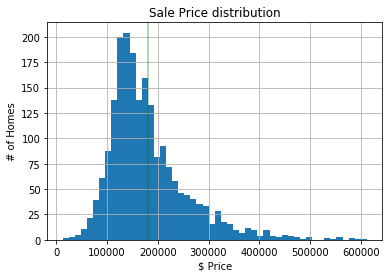

In [32]:
# Sale Price distribution visualization

plt.axvline(ntrain['SalePrice'].mean(), c='g', alpha=0.4)
ntrain['SalePrice'].hist(bins=50)
plt.xlabel('$ Price')
plt.ylabel('# of Homes')
plt.title('Sale Price distribution')

In [33]:
ntrain.columns.values

array(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice', 'MS Zoning', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond',

In [34]:
corr = ntrain.corr()
corr.abs()['SalePrice'].sort_values(ascending=False)
'''Overall Qual, Gr Liv Area, Garage Area, Garage Cars, Total Bsmt SF, 
1st Flr SF, Year Built, Year Remod/Add, Full Bath, Garage Yr blt, TotRms AbvGrd, Mas Vnr Area have high correlation to SalePrice'''

'Overall Qual, Gr Liv Area, Garage Area, Garage Cars, Total Bsmt SF, \n1st Flr SF, Year Built, Year Remod/Add, Full Bath, Garage Yr blt, TotRms AbvGrd, Mas Vnr Area have high correlation to SalePrice'

## Setting the X & Y variables/Train_test_Split

In [35]:
Xtrain = ntrain[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', 
'1st Flr SF', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'TotRms AbvGrd', 'Mas Vnr Area']]

ytrain = ntrain['SalePrice']


# Overall Qual True
# Gr Liv Area True
# Garage Area True
# Garage Cars True
# Total Bsmt SF True
# 1st Flr SF True
# Year Built True
# Year Remod/Add True
# Full Bath False -- Removed this after doing RFE
# Garage Yr Blt True
# TotRms AbvGrd True
# Mas Vnr Area T

In [36]:
Xtrain.describe()

,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Garage Yr Blt,TotRms AbvGrd,Mas Vnr Area
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,6.112140,1499.330083,473.674793,1.776694,1057.956850,1164.488055,1971.708922,1984.190151,1978.779620,6.435885,98.626524
std,1.426271,500.447829,215.881933,0.764367,449.303265,396.446923,30.177889,21.036250,24.725364,1.560225,174.324690
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,1872.000000,1950.000000,1895.000000,2.000000,0.000000
25%,5.000000,1129.000000,319.000000,1.000000,793.000000,879.500000,1953.500000,1964.500000,1962.000000,5.000000,0.000000
50%,6.000000,1444.000000,480.000000,2.000000,994.500000,1093.000000,1974.000000,1993.000000,1980.000000,6.000000,0.000000
75%,7.000000,1728.500000,576.000000,2.000000,1318.500000,1405.000000,2001.000000,2004.000000,2001.000000,7.000000,159.000000
max,10.000000,5642.000000,1418.000000,5.000000,6110.000000,5095.000000,2010.000000,2010.000000,2207.000000,15.000000,1600.000000


In [37]:
print(Xtrain.shape, ytrain.shape)
print('')
print(type(Xtrain), type(ytrain))
# ensuring the shapes and type of obects are the same

(2051, 11) (2051,)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [38]:
# splitting the predictors into train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain)


print(X_train.head)

<bound method NDFrame.head of       Overall Qual  Gr Liv Area  Garage Area  Garage Cars  Total Bsmt SF  1st Flr SF  Year Built  Year Remod/Add  Garage Yr Blt  TotRms AbvGrd  Mas Vnr Area
991              5          969        440.0          2.0          969.0         969        1975            1975         1975.0              5           0.0
1789             5         1728        576.0          2.0         1728.0        1728        1965            1965         1987.0             10         108.0
1491             4         1100        312.0          1.0         1100.0        1100        1960            1960         1960.0              6           0.0
623             10         2492        949.0          3.0         2492.0        2492        2004            2005         2004.0              8         730.0
713              6         1672        240.0          1.0          981.0        1014        1940            1989         1940.0              6           0.0
1912             6         1

In [39]:
X_train.isnull().sum()[X_train.isnull().sum()>0] # no null values

Series([], dtype: int64)

In [40]:
# Standardize the data for X_train

ss = StandardScaler()
ss.fit(X_train)
Xs = ss.transform(X_train)

In [41]:
print(Xs)

Xs_train = pd.DataFrame(Xs, columns=X_train.columns)
# changing the Xs_train after it's standardized to a dataframe

[[-0.75973587 -1.0546316  -0.12557733 ..., -0.11337448 -0.90129814
  -0.5588667 ]
 [-0.75973587  0.47259888  0.51182614 ...,  0.36228802  2.25632496
   0.0637773 ]
 [-1.45983999 -0.79103846 -0.72548648 ..., -0.7079526  -0.26977352
  -0.5588667 ]
 ..., 
 [ 1.34057648 -0.53750613  0.08064144 ...,  0.00554115 -1.53282276
  -0.5588667 ]
 [-0.75973587 -0.9399384  -0.74423364 ..., -0.03409739 -0.90129814
  -0.5588667 ]
 [ 0.64047236  0.3518692  -1.00669389 ..., -1.30253072  0.99327572
  -0.5588667 ]]


In [42]:
Xs_train.head() # checking the view of the standardized Xs_training data

,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Garage Yr Blt,TotRms AbvGrd,Mas Vnr Area
0,-0.759736,-1.054632,-0.125577,0.310316,-0.194603,-0.489115,0.134956,-0.417663,-0.113374,-0.901298,-0.558867
1,-0.759736,0.472599,0.511826,0.310316,1.559149,1.452227,-0.195347,-0.891524,0.362288,2.256325,0.063777
2,-1.459840,-0.791038,-0.725486,-0.990137,0.108086,-0.154048,-0.360499,-1.128455,-0.707953,-0.269774,-0.558867
3,2.740785,2.009890,2.259999,1.610769,3.324454,3.406357,1.092836,1.003920,1.036143,0.993276,3.649746
4,-0.059632,0.359918,-1.062935,-0.990137,-0.166876,-0.374015,-1.021106,0.245742,-1.500723,-0.269774,-0.558867


## Starting to fit the data to a linear regression model!

In [43]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
# scoring the data 
lm.score(X_train, y_train)

0.80937698164158123

In [45]:
# the model performed better on the test data, not sure why but good!
lm.score(X_test, y_test)

0.75129614142180534

In [46]:
print(Xs_train.shape, X_test.shape, y_train.shape, y_test.shape)
# ensuring the shape stays the same

(1538, 11) (513, 11) (1538,) (513,)


In [47]:
lm_scores = cross_val_score(lm, X_train, y_train, cv=5) # calcualting the score for the linear regression model
lm_predict = cross_val_predict(lm, X_train, y_train, cv=5)

In [48]:
lm_scores.mean()
# 77% predictive power

0.80467991322030075

In [49]:
lm_predict # Predicted values

array([ 126001.405965  ,  184645.81599295,  100566.35490518, ...,
        207376.74771334,  133149.22694588,  164927.75072287])

# Looking at the test data

In [50]:
test_cat = test.select_dtypes(include=['object'])
test_num = pd.DataFrame(test.select_dtypes(include=['int64', 'float']))
# separate the categorical and numerical variables in the test data

In [51]:
test_num_sel = test_num[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', 
'1st Flr SF', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'TotRms AbvGrd', 'Mas Vnr Area']]
# select only the numberical variables 

In [52]:
test_num_sel.shape

(879, 11)

In [53]:
test_num_sel.isnull().sum()

Overall Qual       0
Gr Liv Area        0
Garage Area        0
Garage Cars        0
Total Bsmt SF      0
1st Flr SF         0
Year Built         0
Year Remod/Add     0
Garage Yr Blt     45
TotRms AbvGrd      0
Mas Vnr Area       1
dtype: int64

In [54]:
# Imputing the test data variables that are missing
test_num_sel['Garage Yr Blt'] = train_imputer.transform(test_num_sel[['Garage Yr Blt']])
test_num_sel['Mas Vnr Area'] = train_imputer.transform(test_num_sel[['Mas Vnr Area']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
test_num_sel.shape

(879, 11)

In [56]:
# Transforming the predictor variables for the test dataset
ss.transform(test_num_sel)

array([[-0.05963176,  0.87503115, -0.12557733, ..., -2.68987968,
         1.62480034, -0.5588667 ],
       [-0.75973587,  0.95350544,  0.5305733 , ..., -0.03409739,
         2.25632496, -0.5588667 ],
       [ 0.64047236,  0.00577744, -0.1911924 , ...,  1.11542031,
         0.3617511 , -0.5588667 ],
       ..., 
       [-0.75973587, -0.56768855, -0.67861858, ..., -0.39084427,
        -0.90129814, -0.5588667 ],
       [-1.45983999, -1.26590854,  0.28686021, ..., -0.15301302,
        -0.90129814, -0.5588667 ],
       [-0.75973587, -1.1431667 , -0.35991684, ..., -0.90614531,
        -0.90129814, -0.5588667 ]])

In [57]:
# assigning the predictions to a variable
test_predictions = lm.predict(test_num_sel)

test_predictions.shape # checking the shape

(879,)

In [58]:
test_predictions[0:5] # viewing the first 5 predictions

array([ 160892.62454051,  210865.47959089,  190132.36514517,
        126327.36153186,  184772.32577691])

In [59]:
ID = test[['Id']] # exttracting the Id column from the teset data

PRED = pd.DataFrame(test_predictions, columns=['SalePrice']) 
# Creating a predictions dataframe from the test_predictions earlier

PREDICTIONS = pd.concat((ID, PRED), axis=1) # combinging the ID and predictions dataframe into one table

In [60]:
PREDICTIONS.to_csv('Marks_submission3.csv', index=False) 
# Saving the predictions to CSV file for submission

In [61]:
PREDICTIONS.head() # viewing the table of predicted prices.
# the submission for the predicted prices are saved as a .csv file in the same repository as this notebook

,Id,SalePrice
0,2658,160892.624541
1,2718,210865.479591
2,2414,190132.365145
3,1989,126327.361532
4,625,184772.325777
